<h1> Implémentation des Arbres binaires avec des tuples </h1>

<h2>  1.  Représentation avec un seul tuple  </h2>

<p> Considérons l'arbre binaire suivant:

<img src =" 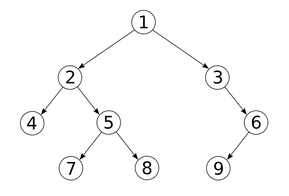" width="200px" height="200px"> </p>

<p> On représenta l'arbre avec un tuple :</p>

arbre = ('1', '2', '3', '4', '5', None, '6', None, None, '7', '8', None, None, '9', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)

Chaque noeud se repère par son indice $n$ dans la liste,
* son fils gauche se trouvant alors à l’indice : $2n+ 1$ 
* son fils droit à l’indice : $2n+ 2$.

&#x2784; est à l’indice 4,  son fils gauche se trouve alors à l’indice 9 et son fils droit à l’indice 10.

<h3> Exercice 1 : </h3>

***Écrire une fonction qui retourne vrai si l'arbre est vide***

In [ ]:
arbre1 = ('1', '2', '3', '4', '5', None, '6', None, None, '7', '8', None, None, '9', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
arbre2=()

In [ ]:
def est_vide(arbre):
    pass

print(est_vide(arbre1))
print(est_vide(arbre2))

***Compléter la fonction qui renvoie les enfants d’un noeud.***

In [ ]:
def enfant(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            if arbre[i] == noeud:
                return ......
            
print(enfant(arbre1,"6"))

***Écrire deux fonctions qui renvoient le fils gauche d’un noeud et son homologue le fils droit s’ils existent.***


In [ ]:
def fils_g(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            pass
            
def fils_d(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            pass            

print(fils_g(arbre1,"6"))
print(fils_d(arbre1,"3"))

***Écrire une fonction qui retourne vrai si le noeud est la racine de l’arbre.***

In [ ]:
def est_racine(arbre,noeud):
    if noeud in arbre:
        pass
print(est_racine(arbre1,"1"))

***Écrire une fonction qui retourne vrai si le noeud est une feuille.***

In [ ]:
def est_feuille(arbre,noeud):
    if noeud in arbre:
        for i in range(len(arbre)):
            pass
print(est_feuille(arbre1,"7"))

<h2> 2. Représentation avec un tuple de tuples  </h2>


* Chaque noeud est un tuple (valeur, fg , fd )

* fg et fd sont eux-mêmes des tuples éventuellement vide s'il n'éxiste pas

Ci-dessous voici la représentation de notre arbre :

In [1]:
sept=("7",(),())
huit=("8",(),())
neuf=("9",(),())
six=("6",neuf,())
cinq=("5",sept,huit)
quatre=("4",(),())
trois=("3",(),six)
deux=("2",quatre,cinq)
arbre1=("1",deux,trois)
print(arbre1)

('1', ('2', ('4', (), ()), ('5', ('7', (), ()), ('8', (), ()))), ('3', (), ('6', ('9', (), ()), ())))


Dans cette situation on accède directement aux noeuds, ce qui permet d'écrire la fonction suivante:

In [2]:
def est_feuille(noeud):
    return noeud[1] == () and noeud[2] == ()

print(est_feuille(trois))
print(est_feuille(sept))

False
True


<h3> La hauteur de l'arbre: </h3>

<h3> Exercice 2 : </h3> 

l'algorithme récursif du calcul de la hauteur de l'arbre est :

<ul>
    <li> Si l'arbre et vide</li>
    <ul><li> renvoyer -1</li></ul>
    <li> Sinon</li>
    <ul>
        <li> h1 = 1 + hauteur(fils_gauche)</li>
        <li> h2 = 1 + hauteur(fils_droit)</li>
        <li> renvoyer max(h1,h2)</li></ul>
    </ul>

attention : dans certains énoncés, la hauteur de l'arbre vide est 0 et non -1 !

***Écrire la fonction hauteur***

In [ ]:
def hauteur(arbre):
    pass

print(hauteur(arbre1))

<h5> Ci-dessous un programme qui permet d'afficher l'arbre : </h5>

<i> nécessite d'avoir réussi la fonction hauteur </i>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(8,8), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if arbre !=():
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre[0])
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre[1], noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre[2], noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre ==():
        return
    
    branches = [[]]
    profondeur = hauteur(arbre)
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre[0])}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre[1], noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre[2], noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()

In [ ]:
repr_graph(arbre1,(4,3),False)

<h3> Exercice 3 : </h3>

Écrire les fonctions suivantes

Tester ces fonctions avec l'arbre1 ci-dessus

In [ ]:
def taille(arbre):
    """fonction qui prend en paramètre d'entrée un arbre et qui renvoie le nombre de ses noeuds"""
    pass

In [ ]:
def est_presente(arbre,etiquette):
     """fonction qui prend en paramètre d'entrée un arbre et une etiquette 
     et renvoie True si etiquette est dans l'arbre ou False sinon"""
    pass

In [ ]:
def nb_feuilles(arbre):
    """fonction qui prend en paramètre d'entrée un arbre et renvoie le nombre de ses feuilles"""
    pass

<h4> Définir l'arbre2 de la fiche de cours, l'afficher et tester les fonctions précédentes sur cet arbre </h4>

<h2> Les parcours d'arbre binaires <br>( partie à traiter après avoir vu les algorithmes de parcours dans un arbre )</h2> 

<h3> Exercice 4 </h3> 

En vous inspirant de ce qui a été vu en cours, écrire les fonctions qui réalisent les parcours en largeur et en profondeur (prefixe, infixe et postfixe) d'un arbre avec cette représentation.

In [ ]:
# parcours largeur
# la classe File donnée
class File:
    ''' classe File
    création d'une instance File avec une liste
    '''
    def __init__(self):
        "Initialisation d'une file vide"
        self.L=[]

    def vide(self):
        "teste si la file est vide"
        return self.L==[]

    def defiler(self):
        "défile"
        assert not self.vide(), "file vide"
        return self.L.pop(0)

    def enfiler(self,x):
        self.L.append(x)
        
def parcours_largeur(arbre):
    pass



l=parcours_largeur(arbre1)
print(parcours_largeur(arbre1))

In [ ]:
#parcours profondeur

# parcours prefixe


def parcours_prefixe(arbre):
    if arbre!=():
        pass
        
parcours_prefixe(arbre1)

In [ ]:
# parcours infixe

def parcours_infixe(arbre) :
    if(arbre != ()) :
        pass

parcours_infixe(arbre1)

In [ ]:
# parcours suffixe ou Postfixe

def parcours_postfixe(arbre) :
    if(arbre != ()) :
        pass

parcours_postfixe(arbre1)